In [28]:
import json
from urllib.request import urlopen
import numpy as np

In [3]:
url=" https://raw.githubusercontent.com/ashwaniYDV/sarcasm-detection-tensorflow/main/sarcasm.json"
data = urlopen(url) 
json_data = json.load(data)

In [4]:
headline = [] #x
is_sarcastic = [] #y label

for x in json_data:
    headline.append(x['headline'])
    is_sarcastic.append(x['is_sarcastic'])

In [18]:
print(*headline[8:67],sep='\n')

top snake handler leaves sinking huckabee campaign
friday's morning email: inside trump's presser for the ages
airline passengers tackle man who rushes cockpit in bomb threat
facebook reportedly working on healthcare features and apps
north korea praises trump and urges us voters to reject 'dull hillary'
actually, cnn's jeffrey lord has been 'indefensible' for a while
barcelona holds huge protest in support of refugees
nuclear bomb detonates during rehearsal for 'spider-man' musical
cosby lawyer asks why accusers didn't come forward to be smeared by legal team years ago
stock analysts confused, frightened by boar market
bloomberg's program to build better cities just got bigger
craig hicks indicted
courtroom sketch artist has clear manga influences
trump assures nation that decision for syrian airstrikes came after carefully considering all his passing whims
qatar deporting dutch woman who reported she was drugged and raped
this is why you shouldn't go to the circus
ted cruz hits the p

In [6]:
print(*is_sarcastic[:5],sep='\n')

0
0
1
1
0


### spliting

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(
    headline, is_sarcastic,test_size=0.2
)

### encoding word

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [11]:
token = Tokenizer(num_words=25000)

token.fit_on_texts(x_train)
x_train_token= token.texts_to_sequences(x_train)
x_test_token= token.texts_to_sequences(x_test)

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train_pad = pad_sequences(x_train_token, maxlen=None, padding ="post")
x_test_pad = pad_sequences(x_test_token, maxlen=None, padding ="post")

In [13]:
x_train_pad.shape

(21367, 40)

### modeling

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Embedding , Dense

In [51]:
model= Sequential([
    Embedding(input_dim=25000, input_length = 40,
              output_dim=8),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid' )
])

In [52]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

### Early stopping

In [53]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor= 'val_accuracy', patience=2)

### training data 

In [44]:
x_train_pad = np.array(x_train_pad)
x_test_pad = np.array(x_test_pad)
y_test = np.array(y_test)
y_train = np.array(y_train)


In [60]:
hasil = model.fit(
    x_train_pad,
    y_train,
    epochs = 50,
    validation_split = 0.2,
    callbacks= early_stop,
)

Epoch 1/50


535/535 [==============================] - 18s 34ms/step - loss: 0.0650 - accuracy: 0.9811 - val_loss: 0.6160 - val_accuracy: 0.8320
Epoch 2/50
535/535 [==============================] - 17s 31ms/step - loss: 0.0387 - accuracy: 0.9897 - val_loss: 0.7309 - val_accuracy: 0.8248
Epoch 3/50
535/535 [==============================] - 17s 31ms/step - loss: 0.0288 - accuracy: 0.9926 - val_loss: 0.8067 - val_accuracy: 0.8210


In [61]:
model.evaluate(x_test_pad, y_test)

167/167 [==============================] - 1s 9ms/step - loss: 0.4276 - accuracy: 0.8353


[0.4276117980480194, 0.8352676630020142]

In [56]:
import matplotlib.pyplot as plt

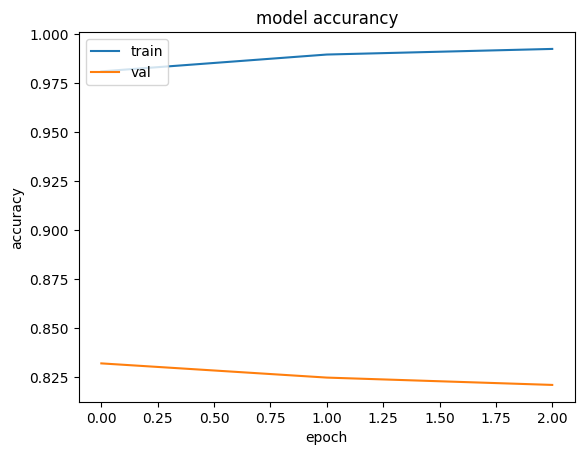

In [62]:
plt.plot(hasil.history['accuracy'])
plt.plot(hasil.history['val_accuracy'])
plt.title('model accurancy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [67]:
text = ['No, Lauren Boeber Had Nothing To Do with That',
        'Breaking news: wordl dsicovers a from that traffics jams']
text_token = token.texts_to_sequences(text)
text_token_pad = pad_sequences(text_token, maxlen=40, padding ="post")
text_token_pad = np.array(text_token_pad)

In [70]:
pred = model.predict(text_token_pad)
np.where(pred> 0.5,'sarcasm','no sarcasm')

1/1 [==============================] - 0s 44ms/step


array([['no sarcasm'],
       ['sarcasm']], dtype='<U10')